In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
ca = cerberus.read('cerberus_annot_triplets.h5')
c_dict, order = get_biosample_colors()
c_dict[np.nan] = 'k'

mm_tissues = ['adrenal gland', 'heart',
              'muscle', 'brain', 'pgp1_excite_neuron',
              'pgp1_astro', 'h9_osteocyte']
mmap = {'v40': '*', 'v29': 'x', 'obs_det': '^', 'cerberus': '2', 'obs_major': '^'}
subset = {'source': ['v40', 'obs_det', 'sample_major']}

## Det isoforms

10
300
(10.716, 10)


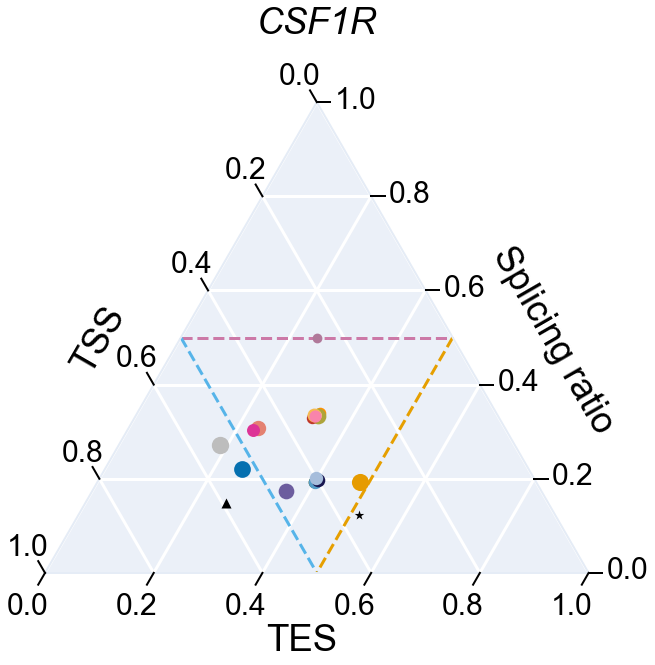

In [6]:
# CSF1R
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='CSF1R',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_det']},
            size_scale=1,
            fname='figures/simplex_csf1r.pdf')

10
300
(10.716, 10)


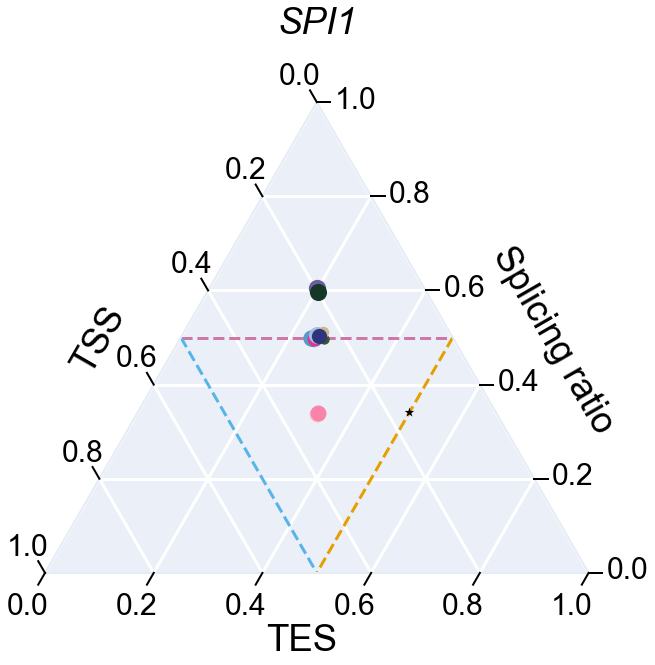

In [5]:
# SPI1
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='SPI1',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_det']},
            size_scale=1,
            fname='figures/simplex_spi1.pdf')

In [7]:
temp = ca.triplets.copy(deep=True)
temp = cerberus.compute_simplex_coords(temp, 'splicing_ratio')
temp.loc[(temp.gname=='CSF1R')&(temp.source=='sample_det')]


,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,gname,sample,gene_tpm,tss_ratio,tes_ratio,spl_ratio
9626,sample_det,ENSG00000182578,1.0,1.0,1.0,1.0,1.000000,CSF1R,caco2,10.521965,0.333333,0.333333,0.333333
24552,sample_det,ENSG00000182578,1.0,1.0,2.0,2.0,2.000000,CSF1R,brain,7.030236,0.250000,0.250000,0.500000
39904,sample_det,ENSG00000182578,1.0,1.0,1.0,1.0,1.000000,CSF1R,mcf10a,2.865204,0.333333,0.333333,0.333333
67442,sample_det,ENSG00000182578,4.0,3.0,5.0,5.0,1.428571,CSF1R,lung,33.947491,0.474576,0.355932,0.169492
81803,sample_det,ENSG00000182578,3.0,1.0,3.0,3.0,1.500000,CSF1R,hl60_m0,59.988159,0.545455,0.181818,0.272727
95560,sample_det,ENSG00000182578,2.0,2.0,2.0,2.0,1.000000,CSF1R,colon,11.011693,0.400000,0.400000,0.200000
170712,sample_det,ENSG00000182578,1.0,1.0,1.0,1.0,1.000000,CSF1R,liver,34.944191,0.333333,0.333333,0.333333
204275,sample_det,ENSG00000182578,2.0,2.0,2.0,2.0,1.000000,CSF1R,hl60_m2_24hr,16.768864,0.400000,0.400000,0.200000
218571,sample_det,ENSG00000182578,2.0,1.0,2.0,2.0,1.333333,CSF1R,vessels,30.632278,0.461538,0.230769,0.307692
260563,sample_det,ENSG00000182578,2.0,2.0,2.0,2.0,1.000000,CSF1R,ovary,17.753927,0.400000,0.400000,0.200000


10
300
(10.716, 10)


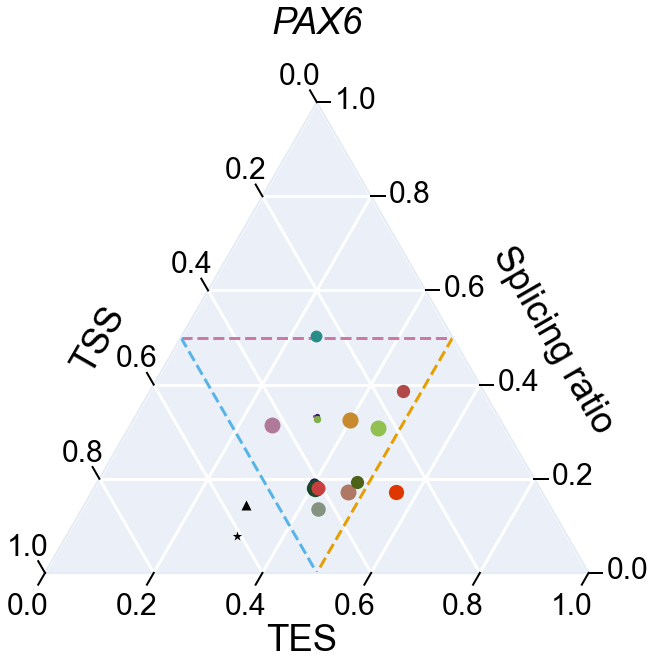

In [3]:
# PAX6
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='PAX6',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_det']},
            size_scale=1,
            fname='figures/simplex_pax6.pdf')

0.4
12.0
(2.1431999999999998, 2.0)


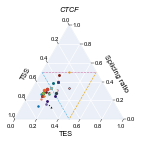

In [10]:
# CTCF
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='CTCF',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_det']},
            size_scale=0.2,
            fname='figures/simplex_ctcf.pdf')

## Major isoforms

10
300
(10.716, 10)


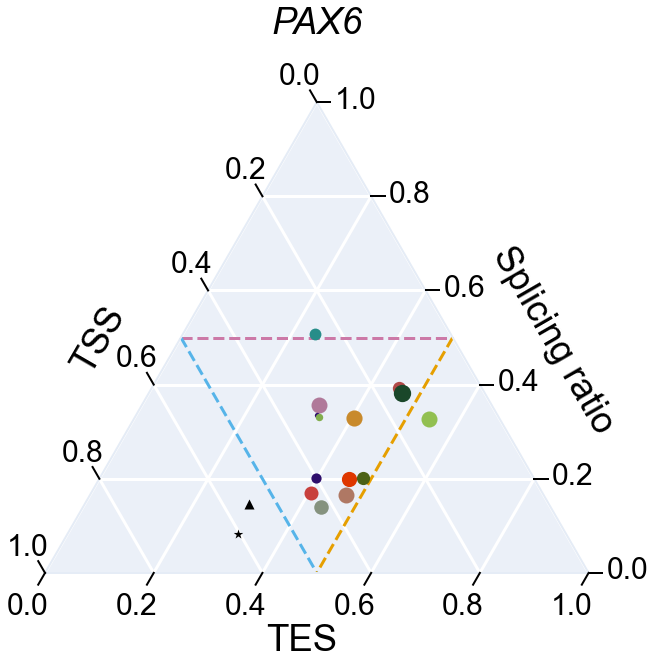

In [4]:
# PAX6
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='PAX6',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_major']},
            size_scale=1,
            fname='figures/simplex_pax6_major.pdf')

In [11]:
mmap

{'v40': '*', 'v29': 'x', 'obs_det': '^', 'cerberus': '2', 'obs_major': '^'}

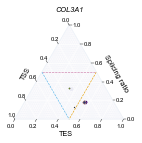

In [12]:
# COL3A1
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='COL3A1',
            hue='sample',
            cmap=c_dict,
            density=True,
            density_scale=50,
            density_cmap='Purples',
            density_vmax=7,
            size='gene_tpm',         
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_major', 'sample_major']},
            size_scale=0.2,
            fname='figures/simplex_col3a1_major.pdf')

0.4
12.0
(2.1431999999999998, 2.0)


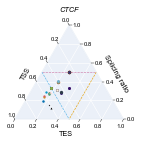

In [8]:
# ctcf
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='CTCF',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_major']},
            size_scale=0.2,
            fname='figures/simplex_ctcf_major.pdf')

0.4
12.0
(2.1431999999999998, 2.0)


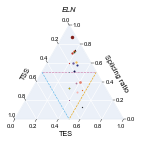

In [9]:
# eln
subset = {'source': ['v40', 'obs_det', 'sample_det']}
df = ca.plot_simplex(top='splicing_ratio', 
            gene='ELN',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_major']},
            size_scale=0.2,
            fname='figures/simplex_eln_major.pdf')

## How many ELN isoforms are in each set?

In [3]:
df = ca.triplets.copy(deep=True)

In [6]:
sources = ['sample_det', 'sample_major']
sample = 'h9_chondro'
df.loc[(df.gname=='ELN')&(df.source.isin(sources))&(df['sample']==sample)]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,gname,sample,gene_tpm
523096,sample_det,ENSG00000049540,2.0,3.0,135.0,278.0,54.000000,ELN,h9_chondro,13063.607422
523096,sample_major,ENSG00000049540,1.0,2.0,31.0,57.0,20.666667,ELN,h9_chondro,13063.607422
